In [3]:
import pandas as pd


In [5]:
df = pd.read_csv('../Data/simple_ml_analysis.csv')

In [6]:
df

,Unnamed: 0,Date,Carrier_code,Flight_num,Origin,Dest,Distance,Is_Delay
0,0,0,0,3280,134,21,300.0,0
1,1,0,0,3281,233,85,596.0,1
2,2,0,0,3282,101,85,229.0,1
3,3,0,0,3283,337,21,223.0,1
4,4,0,0,3284,21,126,579.0,1
...,...,...,...,...,...,...,...,...
7422032,7422032,364,3,846,210,334,989.0,0
7422033,7422033,364,3,854,92,46,399.0,1
7422034,7422034,364,3,860,261,46,280.0,1
7422035,7422035,364,3,861,46,317,1674.0,1


In [7]:
df = df.iloc[: , 1:]
df

,Date,Carrier_code,Flight_num,Origin,Dest,Distance,Is_Delay
0,0,0,3280,134,21,300.0,0
1,0,0,3281,233,85,596.0,1
2,0,0,3282,101,85,229.0,1
3,0,0,3283,337,21,223.0,1
4,0,0,3284,21,126,579.0,1
...,...,...,...,...,...,...,...
7422032,364,3,846,210,334,989.0,0
7422033,364,3,854,92,46,399.0,1
7422034,364,3,860,261,46,280.0,1
7422035,364,3,861,46,317,1674.0,1


In [9]:
from sklearn import tree
X = df.iloc[:,:6]
y = df.iloc[:,6:]

In [10]:
X

,Date,Carrier_code,Flight_num,Origin,Dest,Distance
0,0,0,3280,134,21,300.0
1,0,0,3281,233,85,596.0
2,0,0,3282,101,85,229.0
3,0,0,3283,337,21,223.0
4,0,0,3284,21,126,579.0
...,...,...,...,...,...,...
7422032,364,3,846,210,334,989.0
7422033,364,3,854,92,46,399.0
7422034,364,3,860,261,46,280.0
7422035,364,3,861,46,317,1674.0


In [11]:
y

,Is_Delay
0,0
1,1
2,1
3,1
4,1
...,...
7422032,0
7422033,1
7422034,1
7422035,1


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

<AxesSubplot:>

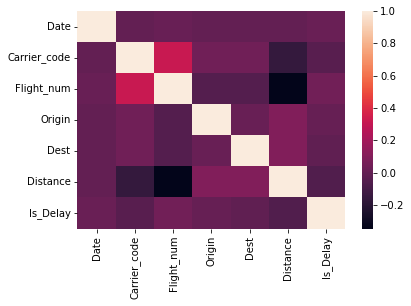

In [15]:
sns.heatmap(df.corr())

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (5195425, 6)
Testing split input-  (2226612, 6)


In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [20]:
y_pred = clf.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))


Classification report - 
               precision    recall  f1-score   support

           0       0.51      0.52      0.51    909629
           1       0.66      0.66      0.66   1316983

    accuracy                           0.60   2226612
   macro avg       0.59      0.59      0.59   2226612
weighted avg       0.60      0.60      0.60   2226612



Text(0.5, 1.0, 'Accuracy Score: 0.6008271759965365')

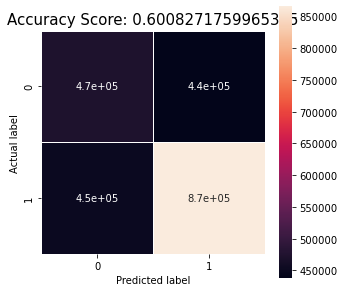

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
tree.plot_tree(clf)